In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB



In [25]:
# load the dataset of SMS messages
df = pd.read_table('SMSSPamCollection', header=None, encoding='utf-8')

In [26]:
# print useful information about the dataset
print(df.info())
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
0    5572 non-null object
1    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB
None
      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...


In [27]:
df.describe()

,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
df.columns

Int64Index([0, 1], dtype='int64')

In [34]:
df.columns = ['type','sms']

In [35]:
df.columns

Index(['type', 'sms'], dtype='object')

In [37]:
df.head(5)

,type,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


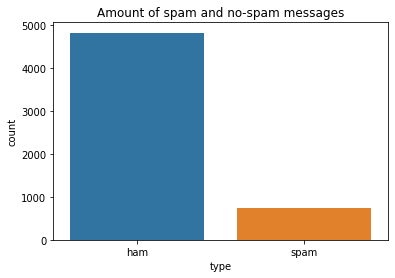

In [38]:
#compare the types of HAM (non SPAM) vs SPAM
sns.countplot(data = df, x= df["type"]).set_title("Amount of spam and no-spam messages")
plt.show()

In [41]:
# count 
df.shape


(5572, 2)

In [42]:
# check and remove duplicate
df.drop_duplicates(inplace=True)


In [43]:
# check after duplicate remove 
df.shape

(5169, 2)

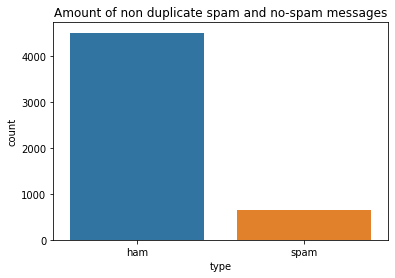

In [44]:
#compare the types of HAM (non SPAM) vs SPAM after duplicate removal
sns.countplot(data = df, x= df["type"]).set_title("Amount of non duplicate spam and no-spam messages")
plt.show()

In [45]:
# Find for missing data
df.isnull().sum()

type    0
sms     0
dtype: int64

In [39]:
#classes = df[0]
#print(classes.value_counts())

In [40]:
#classes.head

In [31]:
classes_sms = df[1]
print(classes_sms.value_counts())

Sorry, I'll call later                                                                                                                                                             30
I cant pick the phone right now. Pls send a message                                                                                                                                12
Ok...                                                                                                                                                                              10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear                             4
Ok                                                                                                                                                                                  4
                                                                                          

In [33]:
# check and delelte duplicate
classes_sms.shape
classes_sms.drop_duplicates(inplace=True)
classes_sms.shape

(5169,)

In [16]:
from sklearn.preprocessing import LabelEncoder

# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)
print(classes[:10])
print(Y[:10])

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: 0, dtype: object
[0 0 1 0 0 1 0 0 1 1]


In [17]:
text_messages = df[1]
print(text_messages[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: 1, dtype: object


2.1 Regular Expressions
Some common regular expression metacharacters - copied from wikipedia

^ Matches the starting position within the string. In line-based tools, it matches the starting position of any line.

. Matches any single character (many applications exclude newlines, and exactly which characters are considered newlines is flavor-, character-encoding-, and platform-specific, but it is safe to assume that the line feed character is included). Within POSIX bracket expressions, the dot character matches a literal dot. For example, a.c matches "abc", etc., but [a.c] matches only "a", ".", or "c".

[ ] A bracket expression. Matches a single character that is contained within the brackets. For example, [abc] matches "a", "b", or "c". [a-z] specifies a range which matches any lowercase letter from "a" to "z". These forms can be mixed: [abcx-z] matches "a", "b", "c", "x", "y", or "z", as does [a-cx-z]. The - character is treated as a literal character if it is the last or the first (after the ^, if present) character within the brackets: [abc-], [-abc]. Note that backslash escapes are not allowed. The ] character can be included in a bracket expression if it is the first (after the ^) character: []abc].

[^ ] Matches a single character that is not contained within the brackets. For example, [^abc] matches any character other than "a", "b", or "c". [^a-z] matches any single character that is not a lowercase letter from "a" to "z". Likewise, literal characters and ranges can be mixed.

$ Matches the ending position of the string or the position just before a string-ending newline. In line-based tools, it matches the ending position of any line.

( ) Defines a marked subexpression. The string matched within the parentheses can be recalled later (see the next entry, \n). A marked subexpression is also called a block or capturing group. BRE mode requires ( ).

\n Matches what the nth marked subexpression matched, where n is a digit from 1 to 9. This construct is vaguely defined in the POSIX.2 standard. Some tools allow referencing more than nine capturing groups.

* Matches the preceding element zero or more times. For example, abc matches "ac", "abc", "abbbc", etc. [xyz] matches "", "x", "y", "z", "zx", "zyx", "xyzzy", and so on. (ab)* matches "", "ab", "abab", "ababab", and so on.

{m,n} Matches the preceding element at least m and not more than n times. For example, a{3,5} matches only "aaa", "aaaa", and "aaaaa". This is not found in a few older instances of regexes. BRE mode requires {m,n}.

In [18]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replace email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [19]:

# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [20]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = processed.str.lower()
print(processed)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in numbr a wkly comp to win fa cup ...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the numbrnd time we have tried numbr c...
5568                  will ü b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: 1, Length: 5572, dtype: object


In [21]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [14]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Ala Uddin/nltk_data'
    - 'c:\\python27\\nltk_data'
    - 'c:\\python27\\share\\nltk_data'
    - 'c:\\python27\\lib\\nltk_data'
    - 'C:\\Users\\Ala Uddin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [22]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [16]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Ala Uddin/nltk_data'
    - 'c:\\python27\\nltk_data'
    - 'c:\\python27\\share\\nltk_data'
    - 'c:\\python27\\lib\\nltk_data'
    - 'C:\\Users\\Ala Uddin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [23]:
>>> nltk.download('stopwords')

from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exzatech01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:

# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [20]:
print processed

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri numbr wkli comp win fa cup final tk...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
5       freemsg hey darl numbr week word back like fun...
6           even brother like speak treat like aid patent
7       per request mell mell oru minnaminungint nurun...
8       winner valu network custom select receivea num...
9       mobil numbr month u r entitl updat latest colo...
10      gonna home soon want talk stuff anymor tonight...
11      six chanc win cash numbr numbr numbr pound txt...
12      urgent numbr week free membership numbr numbr ...
13      search right word thank breather promis wont t...
14                                            date sunday
15      xxxmobilemovieclub use credit click wap link n...
16                                             oh k watch
17      eh u r

In [21]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [22]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 6562
Most common words: [(u'numbr', 2961), (u'u', 1207), (u'call', 679), (u'go', 456), (u'get', 451), (u'ur', 391), (u'gt', 318), (u'lt', 316), (u'come', 304), (u'ok', 293), (u'free', 284), (u'day', 276), (u'know', 275), (u'love', 266), (u'like', 261)]


In [23]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [24]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(processed[0])
for key, value in features.items():
    if value == True:
        print key

avail
buffet
world
great


In [25]:
prcessed[0]

NameError: name 'prcessed' is not defined

In [26]:
processed[0]

u'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [27]:
# Now lets do it for all the messages
messages = zip(processed, Y)

# define a seed for reproducibility
seed = 1
np.random.seed = seed
np.random.shuffle(messages)

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]

In [28]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

In [29]:
print(len(training))
print(len(testing))

4179
1393


4. Scikit-Learn Classifiers with NLTK
Now that we have our dataset, we can start building algorithms! Let's start with a simple linear support vector classifier, then expand to other algorithms. We'll need to import each algorithm we plan on using from sklearn. We also need to import some performance metrics, such as accuracy_score and classification_report.

In [30]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 95.1902368988


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)
print('models')


for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

models
K Nearest Neighbors Accuracy: 92.5340990668
Decision Tree Accuracy: 94.4005743001


c:\python27\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 95.5491744436


c:\python27\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy: 94.9030868629


c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGD Classifier Accuracy: 95.1184493898
Naive Bayes Accuracy: 94.9748743719
SVM Linear Accuracy: 95.1902368988


In [34]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 95.1902368988


In [35]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

In [36]:
# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1192
           1       0.96      0.74      0.83       201

   micro avg       0.96      0.96      0.96      1393
   macro avg       0.96      0.87      0.90      1393
weighted avg       0.96      0.96      0.96      1393



predicted     
                  ham spam
actual ham       1186    6
       spam        53  148